Command run to generate data:

```bash
python app/process.py \
    --input_dir=/media/ssd/drinnenb/202008-settling \
    --output_dir=/media/ssd/drinnenb/202008-settling-output \
    --recording=20200822TEST:2p15Hz-000 \
    --preprocess \
    --settle_time=5 \
    --artefact_shift=5 \
    --artefact_buffer=2
```

In [1]:
base_dir = r'F:\AD\output\20210622M216\slm-000'
nsamples = 5

In [2]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

artefact_h5 = f'{base_dir}/output/artefact.h5'
uncorrected_h5 = f'{base_dir}/hdf5/uncorrected/uncorrected.h5'
corrected_h5 = f'{base_dir}/hdf5/data/data.h5'

artefact = pd.read_hdf(artefact_h5, 'data')

with h5py.File(uncorrected_h5, 'r') as hf:
    uncorrected = hf['data'][()]

with h5py.File(corrected_h5, 'r') as hf:
    corrected = hf['data'][()]
    
samples = artefact.sample(nsamples).reset_index().sort_values(['frame', 'z_plane'])


MemoryError: Unable to allocate 35.8 GiB for an array with shape (4583, 4, 1024, 1024) and data type uint16

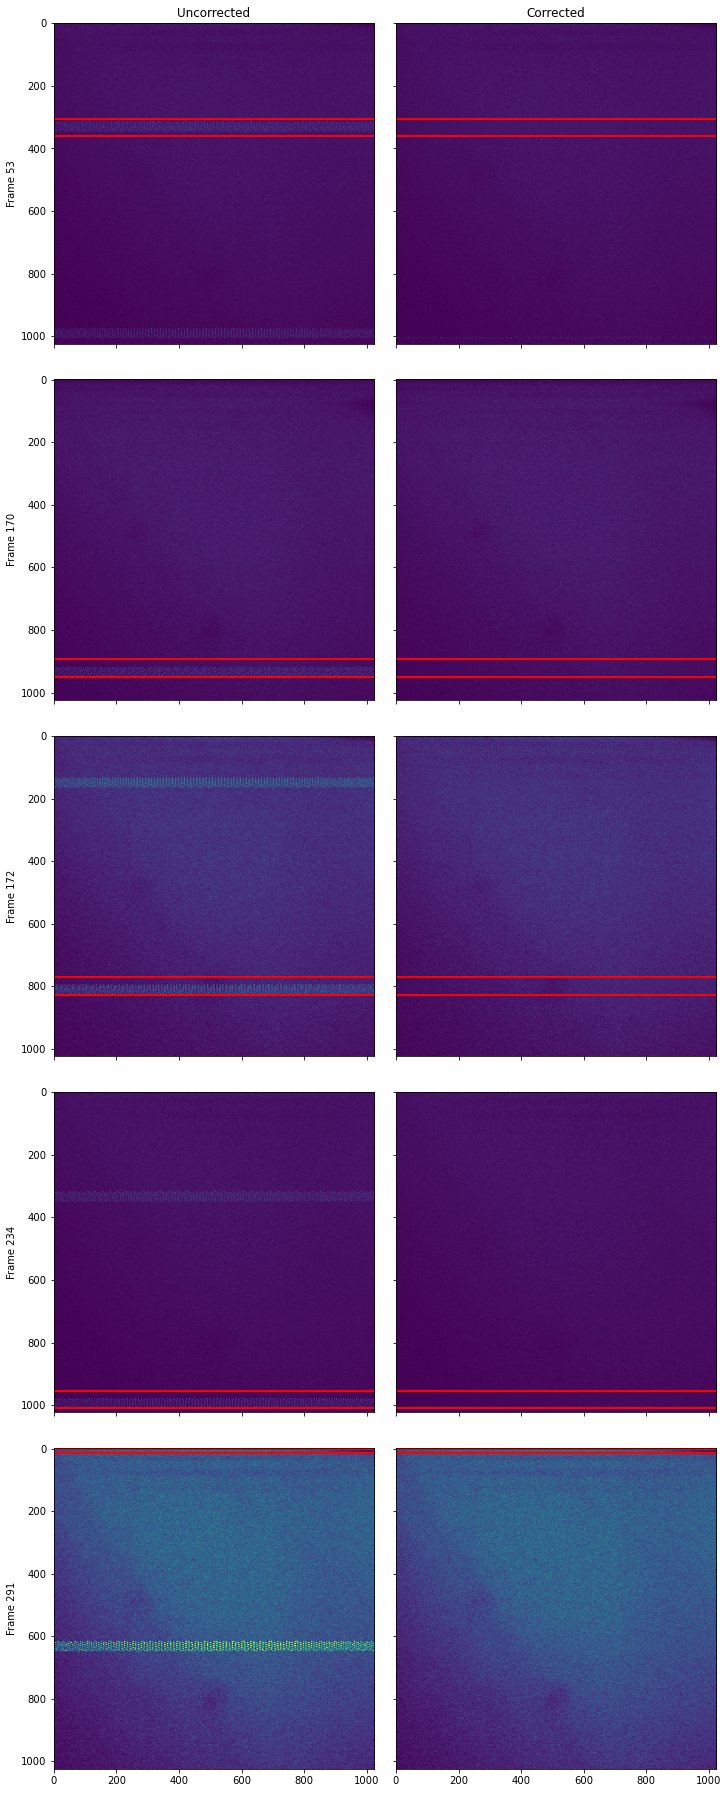

In [31]:
ncols = 2;
_, axes = plt.subplots(nsamples, ncols, figsize=(5*ncols, 5*nsamples), 
                       sharex=True, sharey=True,
                       constrained_layout=True) 

axes[0][0].set_title('Uncorrected')
axes[0][1].set_title('Corrected')

for row, s in enumerate(samples.itertuples()):
    axes[row][0].set_ylabel('Frame %d' % s.frame)
    axes[row][0].imshow(uncorrected[s.frame, s.z_plane],vmin=corrected[s.frame,s.z_plane].min(),vmax=corrected[s.frame,s.z_plane].max())
    axes[row][0].axhline(s.y_min, c='r', lw=2)
    axes[row][0].axhline(s.y_max, c='r', lw=2)
    axes[row][1].imshow(corrected[s.frame, s.z_plane])
    axes[row][1].axhline(s.y_min, c='r', lw=2)
    axes[row][1].axhline(s.y_max, c='r', lw=2)

In [21]:
dir(s)

['Index',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'frame',
 'index',
 'y_max',
 'y_min',
 'z_plane']